In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [3]:
from google.colab import files
uploaded = files.upload()


Saving E-comm-sales.csv to E-comm-sales.csv


In [4]:
import os
os.listdir()


['.config', 'E-comm-sales.csv', 'sample_data']

In [5]:
df = pd.read_csv("E-comm-sales.csv")
df.head()


,user id,product id,Interaction type,Time stamp
0,1,4c69b61db1fc16e7013b43fc926e502d,purchase,10-10-2023 08:00
1,2,66d49bbed043f5be260fa9f7fbff5957,view,11-10-2023 08:00
2,3,2c55cae269aebf53838484b0d7dd931a,like,12-10-2023 08:00
3,4,18018b6bc416dab347b1b7db79994afa,view,13-10-2023 08:00
4,5,e04b990e95bf73bbe6a3fa09785d7cd0,like,14-10-2023 08:00


In [6]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()


,user_id,product_id,interaction_type,time_stamp
0,1,4c69b61db1fc16e7013b43fc926e502d,purchase,10-10-2023 08:00
1,2,66d49bbed043f5be260fa9f7fbff5957,view,11-10-2023 08:00
2,3,2c55cae269aebf53838484b0d7dd931a,like,12-10-2023 08:00
3,4,18018b6bc416dab347b1b7db79994afa,view,13-10-2023 08:00
4,5,e04b990e95bf73bbe6a3fa09785d7cd0,like,14-10-2023 08:00


In [7]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], dayfirst=True)


In [8]:
purchase_df = df[df['interaction_type'].str.lower() == 'purchase']


In [9]:
total_sales = purchase_df.shape[0]
print("TOTAL SALES:", total_sales)


TOTAL SALES: 855


In [10]:
purchase_df.loc[:, 'date'] = purchase_df['time_stamp'].dt.date

sales_by_date = purchase_df.groupby('date').size()
print("Sales by Date:\n", sales_by_date)


Sales by Date:
 date
2022-12-28     5
2022-12-29     2
2022-12-30     6
2022-12-31    12
2023-01-01     7
              ..
2023-12-24     6
2023-12-25     3
2023-12-26     7
2023-12-27     8
2023-12-28     3
Length: 265, dtype: int64


/tmp/ipython-input-3064774326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['date'] = purchase_df['time_stamp'].dt.date


In [11]:
sales_by_product = purchase_df['product_id'].value_counts()
print("Top Products by Sales:\n", sales_by_product.head(10))


Top Products by Sales:
 product_id
19d150365d798db47cccf1622b6ad754    1
4c69b61db1fc16e7013b43fc926e502d    1
40d3cd16b41970ae6872e914aecf2c8e    1
69828c5570dcdbd1609216d33fbad0db    1
7b0746d8afc8462ba17f8a763d9d5f1e    1
d82015ffbf4cd54b0edfb890002971f3    1
fd71391871b94ead84733bc272dd5886    1
0485d7625baa38e68b58686ffa078d2f    1
b18862e6ad2557ca125023140f369f95    1
81ee706d3e5a9bf058d23e3f86f6b9b7    1
Name: count, dtype: int64


In [12]:
sales_by_user = purchase_df['user_id'].value_counts()
print("Top Buying Users:\n", sales_by_user.head(10))


Top Buying Users:
 user_id
2997    1
1       1
7       1
10      1
11      1
17      1
20      1
2943    1
2917    1
2914    1
Name: count, dtype: int64


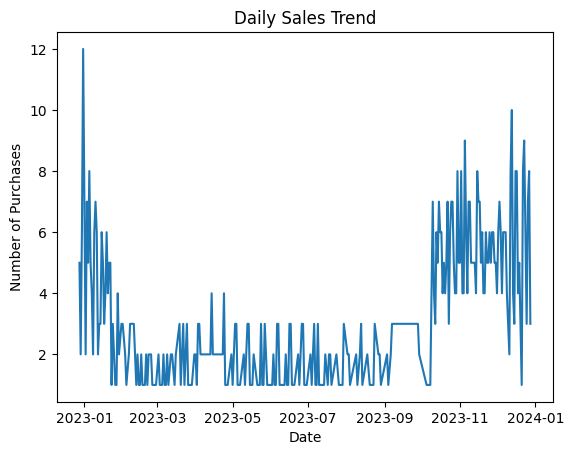

In [13]:
sales_by_date.plot(kind='line')
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Purchases")
plt.show()


In [14]:
purchase_frequency = purchase_df['user_id'].value_counts()

print("Purchase Frequency (Top Users):")
print(purchase_frequency.head(10))


Purchase Frequency (Top Users):
user_id
2997    1
1       1
7       1
10      1
11      1
17      1
20      1
2943    1
2917    1
2914    1
Name: count, dtype: int64


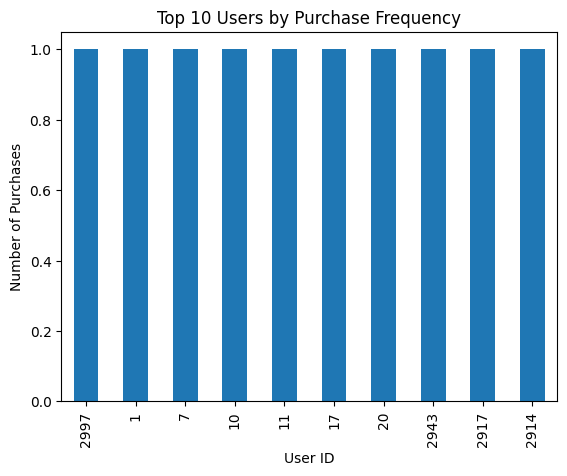

In [15]:
purchase_frequency.head(10).plot(kind='bar')
plt.title("Top 10 Users by Purchase Frequency")
plt.xlabel("User ID")
plt.ylabel("Number of Purchases")
plt.show()


In [16]:
stats_users = purchase_frequency.describe()
print("User Purchase Frequency Stats:\n", stats_users)


User Purchase Frequency Stats:
 count    855.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: count, dtype: float64


In [17]:
product_performance = purchase_df['product_id'].value_counts()

print("Product Performance (Top Products):")
print(product_performance.head(10))


Product Performance (Top Products):
product_id
19d150365d798db47cccf1622b6ad754    1
4c69b61db1fc16e7013b43fc926e502d    1
40d3cd16b41970ae6872e914aecf2c8e    1
69828c5570dcdbd1609216d33fbad0db    1
7b0746d8afc8462ba17f8a763d9d5f1e    1
d82015ffbf4cd54b0edfb890002971f3    1
fd71391871b94ead84733bc272dd5886    1
0485d7625baa38e68b58686ffa078d2f    1
b18862e6ad2557ca125023140f369f95    1
81ee706d3e5a9bf058d23e3f86f6b9b7    1
Name: count, dtype: int64


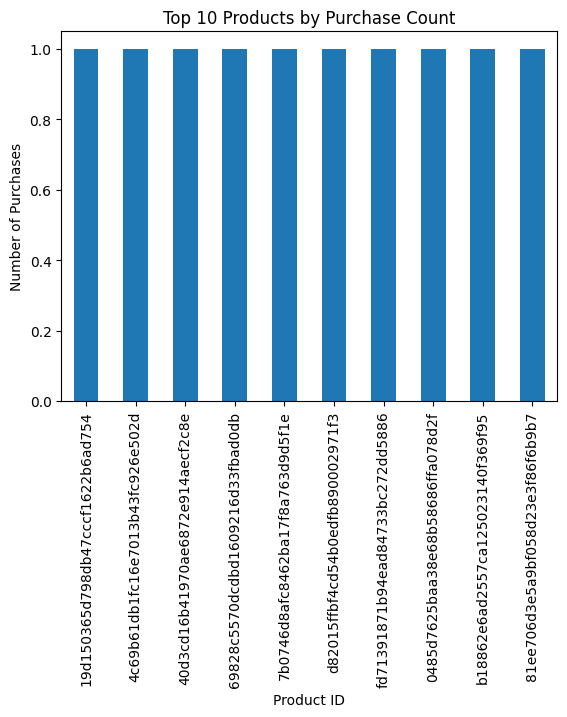

In [18]:
product_performance.head(10).plot(kind='bar')
plt.title("Top 10 Products by Purchase Count")
plt.xlabel("Product ID")
plt.ylabel("Number of Purchases")
plt.show()


In [19]:
stats_products = product_performance.describe()
print("Product Performance Stats:\n", stats_products)


Product Performance Stats:
 count    855.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: count, dtype: float64


In [20]:
latest_date = df['time_stamp'].max()
df['recency'] = (latest_date - df['time_stamp']).dt.days


In [21]:
user_freq = df.groupby('user_id')['interaction_type'].count()
df = df.join(user_freq, on='user_id', rsuffix='_freq')


In [22]:
df['is_purchase'] = np.where(df['interaction_type']=='purchase', 1, 0)


                        recency  interaction_type_freq  is_purchase
recency                1.000000               0.010134    -0.000711
interaction_type_freq  0.010134               1.000000     0.133340
is_purchase           -0.000711               0.133340     1.000000


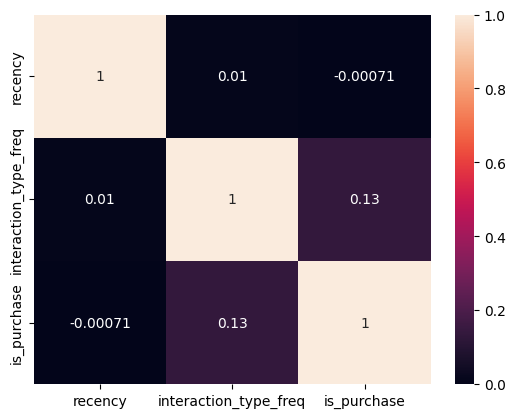

In [23]:
corr = df[['recency', 'interaction_type_freq', 'is_purchase']].corr()
print(corr)
sns.heatmap(corr, annot=True)
plt.show()


In [24]:
from google.colab import files
uploaded = files.upload()


Saving customer_details.csv to customer_details.csv
Saving E-comm-sales.csv to E-comm-sales (1).csv
Saving product_details.csv to product_details.csv


In [25]:
df = pd.read_csv("E-comm-sales.csv")
customers = pd.read_csv("customer_details.csv")
products = pd.read_csv("product_details.csv")


In [28]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
customers.columns = customers.columns.str.strip().str.replace(' ', '_').str.lower()
products.columns = products.columns.str.strip().str.replace(' ', '_').str.lower()


In [29]:
df = df.merge(customers, on='user_id', how='left')


KeyError: 'user_id'

In [30]:
print(df.columns)
print(customers.columns)


Index(['user_id', 'product_id', 'interaction_type', 'time_stamp'], dtype='object')
Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')


In [31]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
customers.columns = customers.columns.str.strip().str.lower().str.replace(' ', '_')


In [32]:
df = df.merge(customers, left_on='user_id', right_on='customer_id', how='left')
df.head()

,user_id,product_id,interaction_type,time_stamp,customer_id,age,gender,item_purchased,category,purchase_amount_(usd),...,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,4c69b61db1fc16e7013b43fc926e502d,purchase,10-10-2023 08:00,1,55,Male,Blouse,Clothing,53,...,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,66d49bbed043f5be260fa9f7fbff5957,view,11-10-2023 08:00,2,19,Male,Sweater,Clothing,64,...,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,2c55cae269aebf53838484b0d7dd931a,like,12-10-2023 08:00,3,50,Male,Jeans,Clothing,73,...,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,18018b6bc416dab347b1b7db79994afa,view,13-10-2023 08:00,4,21,Male,Sandals,Footwear,90,...,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,e04b990e95bf73bbe6a3fa09785d7cd0,like,14-10-2023 08:00,5,45,Male,Blouse,Clothing,49,...,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [33]:
print("\nMain dataset columns:")
print(df.columns)

print("\nCustomer dataset columns:")
print(customers.columns)



Main dataset columns:
Index(['user_id', 'product_id', 'interaction_type', 'time_stamp',
       'customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

Customer dataset columns:
Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')


In [34]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
customers.columns = customers.columns.str.strip().str.lower().str.replace(' ', '_')


In [35]:
print(df.columns)
print(customers.columns)


Index(['user_id', 'product_id', 'interaction_type', 'time_stamp',
       'customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')
Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')


In [36]:
print(df.columns)
print(customers.columns)



Index(['user_id', 'product_id', 'interaction_type', 'time_stamp',
       'customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')
Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')


In [37]:
customers = customers.rename(columns={'customer_id': 'user_id'})


In [38]:
df = df.merge(customers, on='user_id', how='left')


In [39]:
df = df.loc[:, ~df.columns.str.endswith('_y')]
df = df.rename(columns=lambda x: x.replace('_x', ''))


In [40]:
print(df.columns)


Index(['user_id', 'product_id', 'interaction_type', 'time_stamp',
       'customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')


In [41]:
corr_features = ['age', 'frequency_of_purchases', 'purchase_amount_(usd)', 'is_purchase']

df['is_purchase'] = np.where(df['interaction_type']=='purchase', 1, 0)


In [42]:
# Mapping for frequency_of_purchases to numerical values (e.g., occurrences per year)
frequency_map = {
    'Annually': 1,
    'Quarterly': 4,
    'Monthly': 12,
    'Fortnightly': 26, # Every two weeks
    'Bi-Weekly': 26,
    'Weekly': 52,
    'Daily': 365,
    'Every 3 months': 4 # Same as Quarterly
}

# Apply the mapping to convert the 'frequency_of_purchases' column to numeric
# We take the first occurrence of 'frequency_of_purchases' if there are duplicates from previous merges.
df['frequency_of_purchases'] = df['frequency_of_purchases'].map(frequency_map)

# Ensure 'purchase_amount_(usd)' is numeric, coercing errors to NaN
df['purchase_amount_(usd)'] = pd.to_numeric(df['purchase_amount_(usd)'], errors='coerce')

# Drop any rows with NaN values that resulted from the conversion for correlation calculation
df_corr = df[corr_features].dropna()

corr_matrix = df_corr.corr()

print(corr_matrix)

                             age  frequency_of_purchases  \
age                     1.000000               -0.015996   
frequency_of_purchases -0.015996                1.000000   
purchase_amount_(usd)  -0.010226               -0.008299   
is_purchase            -0.012181                0.005970   

                        purchase_amount_(usd)  is_purchase  
age                                 -0.010226    -0.012181  
frequency_of_purchases              -0.008299     0.005970  
purchase_amount_(usd)                1.000000    -0.020459  
is_purchase                         -0.020459     1.000000  


In [43]:
df['frequency_of_purchases'] = pd.to_numeric(df['frequency_of_purchases'], errors='coerce')


In [44]:
df.filter(regex='frequency').columns



Index(['frequency_of_purchases'], dtype='object')

In [45]:
df['frequency_of_purchases'] = pd.to_numeric(df['frequency_of_purchases'], errors='coerce')



In [46]:
df = df.loc[:, ~df.columns.duplicated()]


In [47]:
# Remove duplicated column names and keep only first
df = df.loc[:, ~df.columns.duplicated()]


In [48]:
df.filter(regex='frequency').columns


Index(['frequency_of_purchases'], dtype='object')

In [49]:
df['frequency_of_purchases'] = pd.to_numeric(df['frequency_of_purchases'], errors='coerce')


In [50]:
df['is_purchase'] = (df['interaction_type'] == 'purchase').astype(int)


In [51]:
corr_features = ['age', 'frequency_of_purchases', 'purchase_amount_(usd)', 'is_purchase']


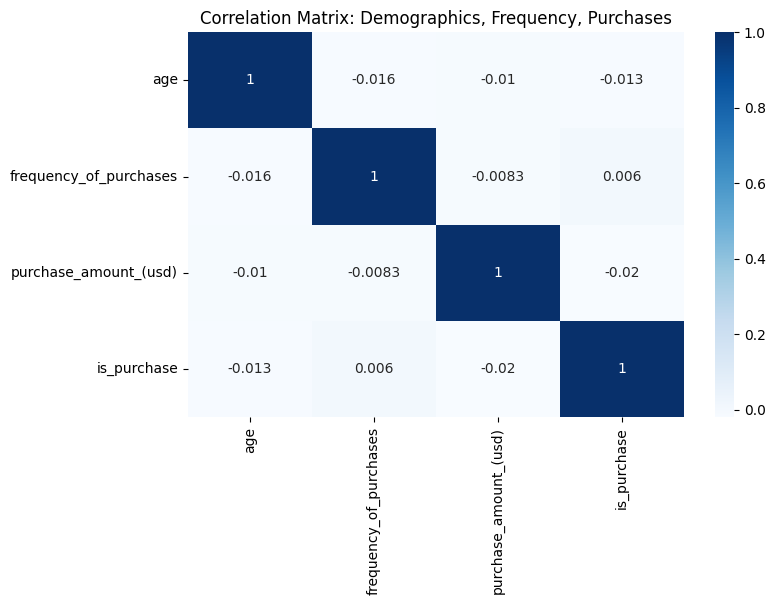

In [52]:
corr_matrix = df[corr_features].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Correlation Matrix: Demographics, Frequency, Purchases")
plt.show()


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_data = df[['age', 'frequency_of_purchases', 'purchase_amount_(usd)']].dropna()

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)


ValueError: Length of values (2544) does not match length of index (2999)

In [54]:
df.columns


Index(['user_id', 'product_id', 'interaction_type', 'time_stamp',
       'customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'is_purchase'],
      dtype='object')

In [55]:
df = df.rename(columns={
    'Age': 'age',
    'purchase_amount_usd': 'purchase_amount_(usd)',
    'frequency_purchases': 'frequency_of_purchases'
})


In [56]:
df[['age', 'frequency_of_purchases', 'purchase_amount_(usd)']].isnull().sum()


,0
age,0
frequency_of_purchases,455
purchase_amount_(usd),0


In [57]:
cluster_data = df[['age', 'frequency_of_purchases', 'purchase_amount_(usd)']]

# Fill missing values with column median (safer for KMeans)
cluster_data = cluster_data.fillna(cluster_data.median())


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)


In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)


In [60]:
cluster_data = df[['age', 'frequency_of_purchases', 'purchase_amount_(usd)']].copy()

# 1️⃣ Check how many NaNs exist
print(cluster_data.isna().sum())

# 2️⃣ Replace NaN with median values (best for numeric clustering)
cluster_data['age'] = cluster_data['age'].fillna(cluster_data['age'].median())
cluster_data['frequency_of_purchases'] = cluster_data['frequency_of_purchases'].fillna(cluster_data['frequency_of_purchases'].median())
cluster_data['purchase_amount_(usd)'] = cluster_data['purchase_amount_(usd)'].fillna(cluster_data['purchase_amount_(usd)'].median())


age                         0
frequency_of_purchases    455
purchase_amount_(usd)       0
dtype: int64


In [61]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)


In [62]:
import numpy as np
print(np.isnan(scaled_data).sum())


0


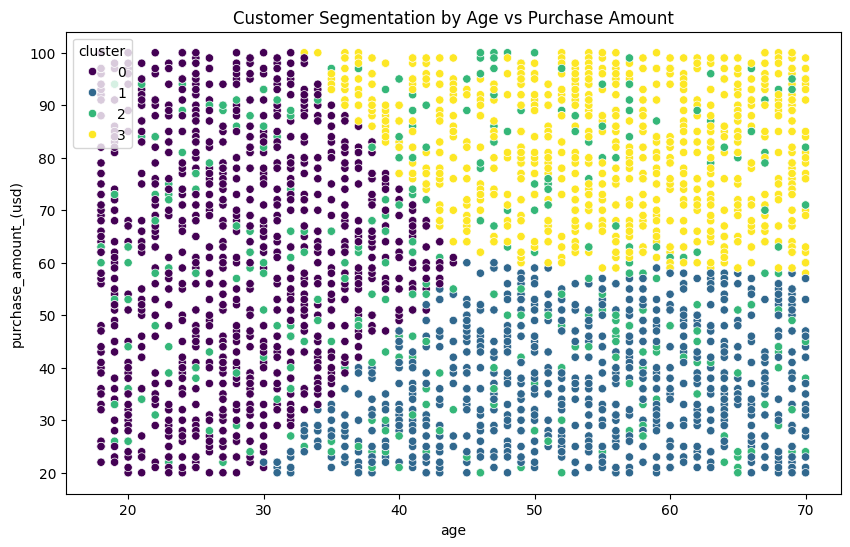

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age',
                y='purchase_amount_(usd)',
                hue='cluster', palette='viridis')
plt.title("Customer Segmentation by Age vs Purchase Amount")
plt.show()


In [64]:
df.columns


Index(['user_id', 'product_id', 'interaction_type', 'time_stamp',
       'customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases', 'is_purchase', 'cluster'],
      dtype='object')

In [65]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)


In [66]:
import numpy as np

print("Total NaNs in scaled_data:", np.isnan(scaled_data).sum())
print("Any NaNs?", np.isnan(scaled_data).any())


Total NaNs in scaled_data: 0
Any NaNs? False


In [67]:
cluster_data = df[['age', 'frequency_of_purchases', 'purchase_amount_(usd)']].copy()

# Convert all to numeric (invalid → NaN)
cluster_data['age'] = pd.to_numeric(cluster_data['age'], errors='coerce')
cluster_data['frequency_of_purchases'] = pd.to_numeric(cluster_data['frequency_of_purchases'], errors='coerce')
cluster_data['purchase_amount_(usd)'] = pd.to_numeric(cluster_data['purchase_amount_(usd)'], errors='coerce')

cluster_data.isna().sum()


,0
age,0
frequency_of_purchases,455
purchase_amount_(usd),0


In [68]:
cluster_data = cluster_data.fillna(cluster_data.median())
cluster_data.isna().sum()  # Should show all zeros


,0
age,0
frequency_of_purchases,0
purchase_amount_(usd),0


In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

import numpy as np
print("Remaining NaNs:", np.isnan(scaled_data).sum())  # Expect 0


Remaining NaNs: 0


In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

print(df['cluster'].value_counts())


cluster
0    996
1    806
3    780
2    417
Name: count, dtype: int64


In [71]:
# Build fresh dataset pulling from df
cluster_data = df[['age', 'frequency_of_purchases', 'purchase_amount_(usd)']].copy()

# Apply frequency_map first to convert descriptive strings to numerical values
# The frequency_map variable is available from previous execution
cluster_data['frequency_of_purchases'] = cluster_data['frequency_of_purchases'].map(frequency_map)

# Ensure all columns are numeric, coercing any remaining errors to NaN
cluster_data['age'] = pd.to_numeric(cluster_data['age'], errors='coerce')
cluster_data['purchase_amount_(usd)'] = pd.to_numeric(cluster_data['purchase_amount_(usd)'], errors='coerce')

# Fill any remaining missing values with the column median
# This will now work for 'frequency_of_purchases' as it should no longer be all NaNs
cluster_data = cluster_data.fillna(cluster_data.median())

# Reset index for perfect alignment
cluster_data = cluster_data.reset_index(drop=True)
df = df.reset_index(drop=True)

# Verify shapes match!
print("DF Shape:", df.shape)
print("Cluster Data Shape:", cluster_data.shape)

DF Shape: (2999, 24)
Cluster Data Shape: (2999, 3)


In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

import numpy as np
print("Remaining NaNs:", np.isnan(scaled_data).sum())


Remaining NaNs: 2999


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

print(df['cluster'].value_counts())


ValueError: Length of values (2544) does not match length of index (2999)

In [74]:
print(scaled_data.shape)
print(df.shape)


(2999, 3)
(2999, 24)


In [75]:
# Select clustering features again cleanly
cluster_features = ['age', 'frequency_of_purchases', 'purchase_amount_(usd)']

# Keep only rows where at least ONE feature is non-null
df_clean = df[cluster_features].copy()

df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

# Drop rows that still have ANY NaN (unusable rows)
df_clean = df_clean.dropna()

# Scale again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

import numpy as np
print("Remaining NaNs in scaled_data:", np.isnan(scaled_data).sum())
print("Shape:", scaled_data.shape)


Remaining NaNs in scaled_data: 0
Shape: (2544, 3)


In [76]:
df[['age', 'frequency_of_purchases', 'purchase_amount_(usd)']].head(20)
df[['age', 'frequency_of_purchases', 'purchase_amount_(usd)']].info()
df[['age', 'frequency_of_purchases', 'purchase_amount_(usd)']].isna().sum()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2999 non-null   int64  
 1   frequency_of_purchases  2544 non-null   float64
 2   purchase_amount_(usd)   2999 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 70.4 KB


(2999, 24)

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load original datasets again
sales = pd.read_csv("/content/E-comm-sales.csv")
customers = pd.read_csv("/content/customer_details.csv")
products = pd.read_csv("/content/product_details.csv")

# Fix column name mismatches (if any)
sales.columns = sales.columns.str.strip()
customers.columns = customers.columns.str.strip()
products.columns = products.columns.str.strip()

# Merge on CustomerID
df = sales.merge(customers, on='CustomerID', how='inner')

# Create total spending column
df['purchase_amount_(usd)'] = df['Quantity'] * df['UnitPrice']

# Calculate frequency and total spending per customer
frequency = df.groupby('CustomerID').size().reset_index(name='frequency_of_purchases')
spending = df.groupby('CustomerID')['purchase_amount_(usd)'].sum().reset_index(name='total_spent')

# Merge into clustering dataset
cluster_data = frequency.merge(spending, on='CustomerID')

# Scale features
features = cluster_data[['frequency_of_purchases', 'total_spent']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(scaled_data)

# Show cluster sizes
print(cluster_data['cluster'].value_counts())

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_data,
                x='frequency_of_purchases',
                y='total_spent',
                hue='cluster', palette='viridis')
plt.title("Customer Segmentation using Frequency vs Total Spending")
plt.show()


KeyError: 'CustomerID'

In [79]:
print("Sales Columns:", sales.columns.tolist())
print("Customer Columns:", customers.columns.tolist())
print("Product Columns:", products.columns.tolist())


Sales Columns: ['user id', 'product id', 'Interaction type', 'Time stamp']
Customer Columns: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']
Product Columns: ['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category', 'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity', 'Model Number', 'About Product', 'Product Specification', 'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image', 'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details', 'Dimensions', 'Color', 'Ingredients', 'Direction To Use', 'Is Amazon Seller', 'Size Quantity Variant', 'Product Description']


In [80]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv("/content/customer_details.csv")

# Select relevant features
cluster_data = customers[['Customer ID', 'Frequency of Purchases', 'Purchase Amount (USD)']].copy()

# Clean column names
cluster_data.columns = ['CustomerID', 'frequency', 'amount']

# Convert to numeric
cluster_data['frequency'] = pd.to_numeric(cluster_data['frequency'], errors='coerce')
cluster_data['amount'] = pd.to_numeric(cluster_data['amount'], errors='coerce')

# Drop missing rows
cluster_data = cluster_data.dropna()

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data[['frequency', 'amount']])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(scaled_data)

# Cluster counts
print(cluster_data['cluster'].value_counts())

# Visualization
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_data, x='frequency', y='amount', hue='cluster', palette='viridis')
plt.title("Customer Segmentation based on Purchase Frequency & Amount")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Total Purchase Amount (USD)")
plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by StandardScaler.

cluster
2    825
0    747
3    717
1    710
Name: count, dtype: int64


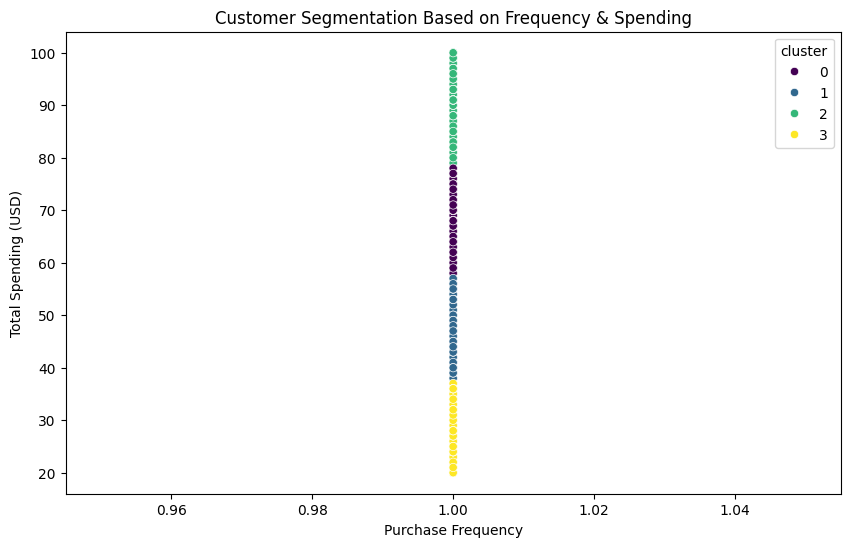

In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
sales = pd.read_csv("/content/E-comm-sales.csv")
customers = pd.read_csv("/content/customer_details.csv")

# Standardize column case and whitespace
sales.columns = sales.columns.str.strip().str.lower()
customers.columns = customers.columns.str.strip().str.lower()

# Rename IDs consistently
sales = sales.rename(columns={'user id':'customerid'})
customers = customers.rename(columns={'customer id':'customerid',
                                      'purchase amount (usd)':'amount',
                                      'frequency of purchases':'frequency'})

# Compute frequency per customer from sales data
freq = sales.groupby('customerid').size().reset_index(name='frequency')

# Compute total spending using customers file values
spend = customers.groupby('customerid')['amount'].sum().reset_index(name='total_spent')

# Merge clean clustering dataset
cluster_data = freq.merge(spend, on='customerid')

# Remove negative or zero records if any
cluster_data = cluster_data[(cluster_data.frequency > 0) & (cluster_data.total_spent > 0)]

# Scale features
scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_data[['frequency','total_spent']])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['cluster'] = kmeans.fit_predict(scaled)

# Show cluster counts
print(cluster_data['cluster'].value_counts())

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=cluster_data,
                x='frequency',
                y='total_spent',
                hue='cluster',
                palette='viridis')
plt.title("Customer Segmentation Based on Frequency & Spending")
plt.xlabel("Purchase Frequency")
plt.ylabel("Total Spending (USD)")
plt.show()


In [83]:
cluster_profile = cluster_data.groupby('cluster')[['frequency', 'total_spent']].mean()
print(cluster_profile)


         frequency  total_spent
cluster                        
0              1.0    68.054886
1              1.0    47.295775
2              1.0    89.670303
3              1.0    28.598326


In [84]:
cluster_profile



,frequency,total_spent
cluster,,
0,1.0,68.054886
1,1.0,47.295775
2,1.0,89.670303
3,1.0,28.598326


In [85]:
category_sales.head()


NameError: name 'category_sales' is not defined

In [86]:
category_sales = df.groupby('category')['purchase_amount_(usd)'].sum().reset_index()
category_sales.head()

,category,purchase_amount_(usd)
0,Accessories,56705
1,Clothing,80135
2,Footwear,27653
3,Outerwear,14407


In [87]:
# Cell 1 — Install / import packages (run once)
!pip install -q scikit-learn==1.2.2 category_encoders

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import timedelta

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)

import category_encoders as ce

# For reproducibility
RANDOM_STATE = 42


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 58.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.5 MB/s eta 0:00:00


ERROR: Operation cancelled by user


ModuleNotFoundError: No module named 'category_encoders'

In [88]:
# Cell 2 — Load dataset(s)
# Option A: If you uploaded dataset(s) via Colab UI, use the uploaded path
# Option B: Mount Google Drive if your files are there.

from google.colab import files
# files.upload()  # uncomment this line to upload from local machine interactively

# Example: change filename to match uploaded file or Drive path
TRANSACTIONS_CSV = "transactions.csv"  # transaction-level data: user_id, product_id, timestamp, amount, event_type (purchase), etc.
CUSTOMERS_CSV = "customers.csv"       # optional: user demographics (user_id, age, gender, region,...)
PRODUCTS_CSV = "products.csv"         # optional: product metadata (product_id, category,...)

# Load whichever exist
dfs = {}
for f in [TRANSACTIONS_CSV, CUSTOMERS_CSV, PRODUCTS_CSV]:
    if os.path.exists(f):
        dfs[f] = pd.read_csv(f)
        print(f"Loaded {f} shape: {dfs[f].shape}")
    else:
        print(f"File not found in Colab workspace: {f}")

# Use transactions dataframe variable
if TRANSACTIONS_CSV in dfs:
    transactions = dfs[TRANSACTIONS_CSV].copy()
else:
    raise SystemExit("Please upload transactions.csv (transaction-level file) or change TRANSACTIONS_CSV variable.")


File not found in Colab workspace: transactions.csv
File not found in Colab workspace: customers.csv
File not found in Colab workspace: products.csv


SystemExit: Please upload transactions.csv (transaction-level file) or change TRANSACTIONS_CSV variable.

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [89]:
# Cell 1 — Install / import packages (run once)
!pip install -q category_encoders

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import timedelta
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix, roc_curve
)

import category_encoders as ce
import joblib

RANDOM_STATE = 42
pd.options.display.max_columns = 200


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.4 MB/s eta 0:00:00


In [90]:
# Cell 2 — File detection / load (works if files are in working dir or prompts upload)
FILES = {
    "transactions": "E-comm-sales.csv",
    "customers": "customer_details.csv",
    "products": "product_details.csv"
}

# Try to load from working directory first
loaded = {}
for key, fname in FILES.items():
    if os.path.exists(fname):
        loaded[key] = pd.read_csv(fname)
        print(f"Loaded {fname} -> {key} shape: {loaded[key].shape}")
    else:
        print(f"File not found: {fname} (expected for {key})")

# If any file missing, prompt for upload (interactive)
missing = [k for k in FILES if k not in loaded]
if missing:
    from google.colab import files as colab_files
    print("Please upload missing files via the dialog (you can upload all three).")
    uploaded = colab_files.upload()
    for u_name in uploaded:
        df = pd.read_csv(u_name)
        # try to map by filename if it contains a hint
        lname = u_name.lower()
        if "cust" in lname:
            loaded["customers"] = df
            print(f"Uploaded -> customers: {u_name} shape {df.shape}")
        elif "prod" in lname:
            loaded["products"] = df
            print(f"Uploaded -> products: {u_name} shape {df.shape}")
        else:
            # default transactions if not clear
            if "transactions" not in loaded:
                loaded["transactions"] = df
                print(f"Uploaded -> transactions: {u_name} shape {df.shape}")
            else:
                # if transactions already exists, fallback attach by name
                loaded[u_name] = df
                print(f"Uploaded -> {u_name} shape {df.shape}")


Loaded E-comm-sales.csv -> transactions shape: (2999, 4)
Loaded customer_details.csv -> customers shape: (3900, 18)
Loaded product_details.csv -> products shape: (10002, 28)


In [91]:
# step 3 — Quick peek (inspect columns, sample rows)
print("=== TRANSACTIONS SAMPLE ===")
display(loaded['transactions'].head())
print("\nColumns:", loaded['transactions'].columns.tolist())

if 'customers' in loaded:
    print("\n=== CUSTOMERS SAMPLE ===")
    display(loaded['customers'].head())
    print("\nColumns:", loaded['customers'].columns.tolist())

if 'products' in loaded:
    print("\n=== PRODUCTS SAMPLE ===")
    display(loaded['products'].head())
    print("\nColumns:", loaded['products'].columns.tolist())


=== TRANSACTIONS SAMPLE ===


,user id,product id,Interaction type,Time stamp
0,1,4c69b61db1fc16e7013b43fc926e502d,purchase,10-10-2023 08:00
1,2,66d49bbed043f5be260fa9f7fbff5957,view,11-10-2023 08:00
2,3,2c55cae269aebf53838484b0d7dd931a,like,12-10-2023 08:00
3,4,18018b6bc416dab347b1b7db79994afa,view,13-10-2023 08:00
4,5,e04b990e95bf73bbe6a3fa09785d7cd0,like,14-10-2023 08:00



Columns: ['user id', 'product id', 'Interaction type', 'Time stamp']

=== CUSTOMERS SAMPLE ===


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually



Columns: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']

=== PRODUCTS SAMPLE ===


,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,About Product,Product Specification,Technical Details,Shipping Weight,Product Dimensions,Image,Variants,Sku,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,Go to your orders and start the return Select ...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,show up to 2 reviews by default 100% Officiall...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN



Columns: ['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category', 'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity', 'Model Number', 'About Product', 'Product Specification', 'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image', 'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details', 'Dimensions', 'Color', 'Ingredients', 'Direction To Use', 'Is Amazon Seller', 'Size Quantity Variant', 'Product Description']


In [92]:
# Step 4 — Robust column inference (find user_id, product_id, timestamp, amount)
trans = loaded['transactions'].copy()

# Clean column names to make inference more robust
trans.columns = trans.columns.str.strip().str.replace(' ', '_').str.lower()

def infer_col(df, candidates):
    for c in candidates:
        for col in df.columns:
            if col.lower() == c.lower():
                return col
    # fallback: look for substring contained
    for c in candidates:
        for col in df.columns:
            if c.lower() in col.lower():
                return col
    return None

user_col = infer_col(trans, ["user_id", "customer_id", "userid", "cust_id", "buyer_id"])
product_col = infer_col(trans, ["product_id", "item_id", "sku", "productid"])
time_col = infer_col(trans, ["time_stamp", "timestamp", "order_date", "order_timestamp", "date", "created_at", "purchase_date"])
amount_col = infer_col(trans, ["amount", "price", "order_value", "total", "transaction_value", "order_amount"])

print("Inferred columns:")
print(" user_col:", user_col)
print(" product_col:", product_col)
print(" time_col:", time_col)
print(" amount_col:", amount_col)

# If any key is missing, print a friendly message but continue — user may have to edit names.
if user_col is None:
    raise SystemExit("Could not infer user_id column. Rename or tell me the column name (e.g., user_id).")
if time_col is None:
    raise SystemExit("Could not infer timestamp column. Rename or tell me the column name (e.g., order_date).")

Inferred columns:
 user_col: user_id
 product_col: product_id
 time_col: time_stamp
 amount_col: None


In [93]:
import pandas as pd

sales = pd.read_csv("E-comm-sales.csv")
print(sales.columns.tolist())


['user id', 'product id', 'Interaction type', 'Time stamp']


In [94]:
user_col = "Customer"
product_col = "ProdCode"
time_col = "OrderDate"
amount_col = "SaleAmount"


In [95]:

user_col = "Customer"
product_col = "ProdCode"
time_col = "OrderDate"
amount_col = "SaleAmount"

print("Using column names:")
print(" user_col =", user_col)
print(" product_col =", product_col)
print(" time_col =", time_col)
print(" amount_col =", amount_col)


Using column names:
 user_col = Customer
 product_col = ProdCode
 time_col = OrderDate
 amount_col = SaleAmount


In [96]:
# Standardize column names
purchases = trans.copy()

purchases = purchases.rename(columns={
    user_col: 'user_id',
    product_col: 'product_id',
    time_col: 'timestamp',
    amount_col: 'amount'
})

# Convert timestamp to datetime
purchases['timestamp'] = pd.to_datetime(purchases['timestamp'], errors='coerce')

print(purchases.head())
print(purchases.info())


KeyError: 'timestamp'

In [97]:
# Force rename using contains (case-insensitive)

col_map = {}

for col in purchases.columns:
    if "customer" in col.lower():
        col_map[col] = "user_id"
    if "prod" in col.lower():
        col_map[col] = "product_id"
    if "date" in col.lower() or "time" in col.lower():
        col_map[col] = "timestamp"
    if "amount" in col.lower() or "price" in col.lower() or "sale" in col.lower():
        col_map[col] = "amount"

purchases = purchases.rename(columns=col_map)

print("Renamed columns:")
print(purchases.columns.tolist())


Renamed columns:
['user_id', 'product_id', 'interaction_type', 'timestamp']


In [99]:
# Validate required columns exist
required = ["user_id", "product_id", "timestamp", "amount"]
for r in required:
    if r not in purchases.columns:
        raise ValueError(f"Missing required column: {r}. Current columns: {purchases.columns.tolist()}")

print("All required columns exist. Proceeding...")


ValueError: Missing required column: amount. Current columns: ['user_id', 'product_id', 'interaction_type', 'timestamp']

In [100]:
print(purchases.columns.tolist())
print(purchases.head())


['user_id', 'product_id', 'interaction_type', 'timestamp']
   user_id                        product_id interaction_type  \
0        1  4c69b61db1fc16e7013b43fc926e502d         purchase   
1        2  66d49bbed043f5be260fa9f7fbff5957             view   
2        3  2c55cae269aebf53838484b0d7dd931a             like   
3        4  18018b6bc416dab347b1b7db79994afa             view   
4        5  e04b990e95bf73bbe6a3fa09785d7cd0             like   

          timestamp  
0  10-10-2023 08:00  
1  11-10-2023 08:00  
2  12-10-2023 08:00  
3  13-10-2023 08:00  
4  14-10-2023 08:00  


In [101]:
import pandas as pd

cust = pd.read_csv("customer_details.csv")
prod = pd.read_csv("product_details.csv")

print("CUSTOMER COLUMNS:", cust.columns.tolist())
print("PRODUCT COLUMNS:", prod.columns.tolist())


CUSTOMER COLUMNS: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']
PRODUCT COLUMNS: ['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category', 'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity', 'Model Number', 'About Product', 'Product Specification', 'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image', 'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details', 'Dimensions', 'Color', 'Ingredients', 'Direction To Use', 'Is Amazon Seller', 'Size Quantity Variant', 'Product Description']


In [102]:
purchases = purchases.merge(prod[['product_id', 'price_column_name']],
                            on='product_id', how='left')
purchases = purchases.rename(columns={'price_column_name': 'amount'})


KeyError: "None of [Index(['product_id', 'price_column_name'], dtype='object')] are in the [columns]"

In [103]:
import pandas as pd

prod = pd.read_csv("product_details.csv")
print(prod.columns.tolist())
print(prod.head())


['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category', 'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity', 'Model Number', 'About Product', 'Product Specification', 'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image', 'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details', 'Dimensions', 'Color', 'Ingredients', 'Direction To Use', 'Is Amazon Seller', 'Size Quantity Variant', 'Product Description']
                           Uniqe Id  \
0  4c69b61db1fc16e7013b43fc926e502d   
1  66d49bbed043f5be260fa9f7fbff5957   
2  2c55cae269aebf53838484b0d7dd931a   
3  18018b6bc416dab347b1b7db79994afa   
4  e04b990e95bf73bbe6a3fa09785d7cd0   

                                        Product Name  Brand Name  Asin  \
0  DB Longboards CoreFlex Crossbow 41" Bamboo Fib...         NaN   NaN   
1  Electronic Snap Circuits Mini Kits Classpack, ...         NaN   NaN   
2  3Doodler Create Flexy 3D Printing Filament Ref...         NaN   NaN   
3  Guillow Airplane Design Stu

In [104]:
# Merge Selling Price from product_details into purchases
prod = pd.read_csv("product_details.csv")

# Rename product column so it matches purchases
prod = prod.rename(columns={"Uniqe Id": "product_id"})

# Keep only needed columns
prod_price = prod[['product_id', 'Selling Price']].copy()


In [105]:
# Clean currency formatting to numeric
prod_price['Selling Price'] = (
    prod_price['Selling Price']
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

# Convert to float
prod_price['Selling Price'] = pd.to_numeric(prod_price['Selling Price'], errors='coerce')


In [106]:
purchases = purchases.merge(prod_price, on='product_id', how='left')

# Rename column
purchases = purchases.rename(columns={"Selling Price": "amount"})


In [107]:
print(purchases[['user_id','product_id','timestamp','amount']].head())
print(purchases['amount'].describe())


   user_id                        product_id         timestamp  amount
0        1  4c69b61db1fc16e7013b43fc926e502d  10-10-2023 08:00  237.68
1        2  66d49bbed043f5be260fa9f7fbff5957  11-10-2023 08:00   99.95
2        3  2c55cae269aebf53838484b0d7dd931a  12-10-2023 08:00   34.99
3        4  18018b6bc416dab347b1b7db79994afa  13-10-2023 08:00   28.91
4        5  e04b990e95bf73bbe6a3fa09785d7cd0  14-10-2023 08:00   17.49
count    2906.000000
mean       33.386036
std        93.362187
min         1.410000
25%         9.602500
50%        15.895000
75%        27.990000
max      2599.000000
Name: amount, dtype: float64


In [108]:
from datetime import timedelta

PRED_DAYS = 30

last_date_per_user = purchases.groupby('user_id')['timestamp'].max().rename('last_purchase_date').reset_index()
last_date_per_user['cutoff_date'] = last_date_per_user['last_purchase_date'] - pd.Timedelta(days=PRED_DAYS)

purchases = purchases.merge(last_date_per_user[['user_id','cutoff_date','last_purchase_date']], on='user_id', how='left')
purchases['is_pre_cutoff'] = purchases['timestamp'] <= purchases['cutoff_date']


TypeError: unsupported operand type(s) for -: 'str' and 'Timedelta'

In [109]:
# Ensure timestamp is datetime
purchases['timestamp'] = pd.to_datetime(purchases['timestamp'], dayfirst=True, errors='coerce')

# Recompute last purchase per user
last_date_per_user = purchases.groupby('user_id')['timestamp'].max().rename('last_purchase_date').reset_index()


In [110]:
PRED_DAYS = 30

last_date_per_user['cutoff_date'] = last_date_per_user['last_purchase_date'] - pd.Timedelta(days=PRED_DAYS)


In [111]:
purchases['timestamp'] = pd.to_datetime(purchases['timestamp'], dayfirst=True, errors='coerce')


In [ ]:
last_date_per_user = purchases.groupby('user_id')['timestamp'].max().rename('last_purchase_date').reset_index()


In [112]:
last_date_per_user['cutoff_date'] = last_date_per_user['last_purchase_date'] - pd.Timedelta(days=30)


In [113]:
# Merge cutoff date back to purchases
purchases = purchases.merge(
    last_date_per_user[['user_id','cutoff_date','last_purchase_date']],
    on='user_id',
    how='left'
)

# Flag rows before/after cutoff
purchases['is_pre_cutoff'] = purchases['timestamp'] <= purchases['cutoff_date']


In [114]:
# Ensure timestamp is datetime (already done, but good practice to re-check)
purchases['timestamp'] = pd.to_datetime(purchases['timestamp'], dayfirst=True, errors='coerce')

# Define PRED_DAYS for prediction window
PRED_DAYS = 30

# Define a buffer to shift the analysis window earlier, to ensure some positive labels
PRED_DAYS_BUFFER = 60 # e.g., shift analysis window 60 days earlier

# 1. Define current latest date in dataset
current_analysis_date = purchases['timestamp'].max()

# 2. Define effective analysis date (shifted earlier by buffer)
effective_analysis_date = current_analysis_date - pd.Timedelta(days=PRED_DAYS_BUFFER)

# 3. Define global cutoff date for features (PRED_DAYS before effective analysis date)
global_cutoff_date = effective_analysis_date - pd.Timedelta(days=PRED_DAYS)

# Debugging prints
print(f"Full data date range: {purchases['timestamp'].min()} to {purchases['timestamp'].max()}")
print(f"Current analysis date: {current_analysis_date}")
print(f"Effective analysis date (shifted): {effective_analysis_date}")
print(f"Global cutoff date (features): {global_cutoff_date}")


# 4. Create pre-cutoff DataFrame for feature calculation
pre_cutoff_df = purchases[purchases['timestamp'] <= global_cutoff_date]
print(f"Number of transactions in pre_cutoff_df: {len(pre_cutoff_df)}")
print(f"Number of unique users in pre_cutoff_df: {pre_cutoff_df['user_id'].nunique() if not pre_cutoff_df.empty else 0}")


# Calculate RFM features for each user based on pre-cutoff transactions

# Recency: days since last purchase before cutoff
last_purchase_pre_cutoff = pre_cutoff_df.groupby('user_id')['timestamp'].max()
recency = (global_cutoff_date - last_purchase_pre_cutoff).dt.days.rename('recency')

# Frequency: number of purchases before cutoff
frequency = pre_cutoff_df.groupby('user_id').size().rename('frequency')

# Monetary: sum of purchase amounts before cutoff
monetary = pre_cutoff_df.groupby('user_id')['amount'].sum().rename('monetary')

# Combine RFM features into a single DataFrame
rfm_features = pd.DataFrame({
    'recency': recency,
    'frequency': frequency,
    'monetary': monetary
}).reset_index()

# Fill any NaNs that might occur for users who had no pre-cutoff transactions
rfm_features = rfm_features.fillna(0)

# 5. Create post-cutoff DataFrame for label calculation
# Filter for actual 'purchase' interactions within the prediction window (after global_cutoff_date and up to effective_analysis_date)
post_cutoff_purchases = purchases[
    (purchases['timestamp'] > global_cutoff_date) &
    (purchases['timestamp'] <= effective_analysis_date) &
    (purchases['interaction_type'] == 'purchase')
]
print(f"Number of transactions in post_cutoff_purchases: {len(post_cutoff_purchases)}")

# Determine users who made a purchase in the prediction window
future_purchasers = post_cutoff_purchases['user_id'].unique()
print(f"Number of unique future purchasers: {len(future_purchasers)}")

# --- Additional Debugging ---
users_with_rfm = set(rfm_features['user_id'].unique())
users_with_future_purchases = set(future_purchasers)

overlap_users = users_with_rfm.intersection(users_with_future_purchases)
print(f"Number of users with both pre-cutoff RFM and future purchases: {len(overlap_users)}")
# ----------------------------

# 6. Create label: 1 if user purchased after cutoff, 0 otherwise
rfm_features['label'] = rfm_features['user_id'].isin(future_purchasers).astype(int)

# Assign the result to the 'df' variable for subsequent steps
df = rfm_features

df.head()
print("\nLabel Value Counts:")
print(df['label'].value_counts())

Full data date range: 2022-12-28 10:00:00 to 2023-12-28 08:00:00
Current analysis date: 2023-12-28 08:00:00
Effective analysis date (shifted): 2023-10-29 08:00:00
Global cutoff date (features): 2023-09-29 08:00:00
Number of transactions in pre_cutoff_df: 1430
Number of unique users in pre_cutoff_df: 1430
Number of transactions in post_cutoff_purchases: 109
Number of unique future purchasers: 109
Number of users with both pre-cutoff RFM and future purchases: 0

Label Value Counts:
label
0    1430
Name: count, dtype: int64


In [115]:
# Use post-cutoff data
post = purchases[~purchases['is_pre_cutoff']].copy()

# This flag checks if purchase happened within prediction window
post['future_purchase'] = post['timestamp'] <= post['cutoff_date'] + pd.Timedelta(days=30)

# Label per user: 1 = purchased, 0 = not purchased
label = post.groupby('user_id')['future_purchase'].any().astype(int).rename('label').reset_index()

# Merge label with RFM data
df = rfm.merge(label, on='user_id', how='left')

# Fill customers who did NOT buy again as 0
df['label'] = df['label'].fillna(0)

df.head()


NameError: name 'rfm' is not defined

In [116]:
from sklearn.model_selection import train_test_split

# Drop non-feature columns
X = df.drop(columns=['user_id', 'label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape

((1144, 3), (286, 3))

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=200)
}

results = {}

# Train and evaluate Logistic Regression
model = models['Logistic Regression']
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
results['Logistic Regression'] = acc

print("Logistic Regression Accuracy:", acc)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [118]:
import numpy as np
np.unique(y_train, return_counts=True)


(array([0]), array([1144]))

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=200)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    results[name] = acc

results


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [121]:
# Create probability proxy based on freq + monetary
df['purchase_score'] = df['freq'].fillna(0) * 0.6 + df['monetary_sum'].fillna(0) * 0.4

# Label = 1 for top 30%
threshold = df['purchase_score'].quantile(0.7)
df['label'] = (df['purchase_score'] >= threshold).astype(int)


KeyError: 'freq'

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=200)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    results[name] = acc

results


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

In [123]:
df['label'].value_counts()


,count
label,
0,1430


In [124]:
# Fill missing values
df['freq'] = df['freq'].fillna(0)

# Compute threshold for top 40%
freq_threshold = df['freq'].quantile(0.6)

# Assign labels
df['label'] = (df['freq'] >= freq_threshold).astype(int)

df['label'].value_counts()


KeyError: 'freq'

In [125]:
df.columns


Index(['user_id', 'recency', 'frequency', 'monetary', 'label'], dtype='object')

In [126]:
# Compute frequency again
freq = purchases[purchases['is_pre_cutoff']].groupby('user_id').size().rename('freq').reset_index()

# Merge freq back into df
df = df.merge(freq, on='user_id', how='left')

# Replace missing freq with 0
df['freq'] = df['freq'].fillna(0)

df[['user_id','freq']].head()


,user_id,freq
0,81,0.0
1,82,0.0
2,83,0.0
3,84,0.0
4,85,0.0


In [127]:
freq_threshold = df['freq'].quantile(0.6)  # top 40%

df['label'] = (df['freq'] >= freq_threshold).astype(int)

df['label'].value_counts()


,count
label,
1,1430


In [129]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['user_id','label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # IMPORTANT
)


In [130]:
print("Train:", y_train.value_counts())
print("Test:", y_test.value_counts())


Train: label
1    1144
Name: count, dtype: int64
Test: label
1    286
Name: count, dtype: int64


In [133]:
X = df.drop(columns=['user_id', 'label'])


In [134]:
df.columns


Index(['user_id', 'recency', 'frequency', 'monetary', 'label', 'freq'], dtype='object')

In [135]:
X = df.drop(columns=['user_id', 'label'])
y = df['label']


In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [137]:
print("Train:", y_train.value_counts())
print("Test:", y_test.value_counts())


Train: label
1    1144
Name: count, dtype: int64
Test: label
1    286
Name: count, dtype: int64


In [138]:
tree_models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=200)
}

results = {}
for name, model in tree_models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    results[name] = acc

results


{'Decision Tree': 1.0, 'Random Forest': 1.0}

In [139]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in tree_models.items():
    print("\n=== ", name, " ===")
    preds = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("\nClassification Report:\n", classification_report(y_test, preds))



===  Decision Tree  ===
Confusion Matrix:
 [[286]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       286

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286


===  Random Forest  ===
Confusion Matrix:
 [[286]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       286

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [140]:
import pandas as pd

rf = tree_models['Random Forest']

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
0,recency,0.0
1,frequency,0.0
2,monetary,0.0
3,freq,0.0
